# Boston House Price Prediction:
数据集：https://www.kaggle.com/datasets/vikrishnan/boston-house-prices
## 参考项目：
https://github.com/zhongqiangwu960812/MachineLearnProjects/blob/master/BostonHousePriceRegression/BostonHousePrice.ipynb
## 问题定义&数据集介绍
- 问题定义：预测波士顿房价(回归预测)
- 数据集介绍：数据集包含506个样本和14个特征。
    - CRIM: 城镇人均犯罪率
    - ZN: 住宅用地超过25000平方英尺的占比
    - INDUS: 城镇非零售商用土地的比例  
    - CHAS: 查尔斯河虚拟变量（如果临河则为1，否则为0）
    - NOX: 一氧化氮浓度（parts per 10 million）
    - RM: 每栋住宅的平均房间数
    - AGE: 1940年之前建造的自用房屋比例
    - DIS: 距离波士顿五个就业中心的加权距离
    - RAD: 距离公路的可达性指数
    - TAX: 每一万美元的全值财产税率
    - PTRATIO: 城镇师生比例
    - B: 黑人居民所占比例
    - LSTAT: 低收入人口所占比例
    - MEDV: 房价中位数（以千美元计）

In [ ]:
# 下载数据集
import kagglehub

# Download latest version
# path = kagglehub.dataset_download("vikrishnan/boston-house-prices")
path = '/Users/wangjing/.cache/kagglehub/datasets/vikrishnan/boston-house-prices/versions/1'
print("Path to dataset files:", path)

In [41]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# 数据集处理
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# 算法模型工具
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [42]:
# 加载数据集

col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PRIATIO', 'B', 'LSTAT', 'MEDV']
house_data_df = pd.read_csv(path + "/housing.csv", delim_whitespace=True, names=col_names, header=None)

print(house_data_df.shape)
print(house_data_df.head(10))
print(house_data_df.dtypes)
# 查看数据的统计属性
print(house_data_df.describe())

(506, 14)
      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   

   PRIATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4    

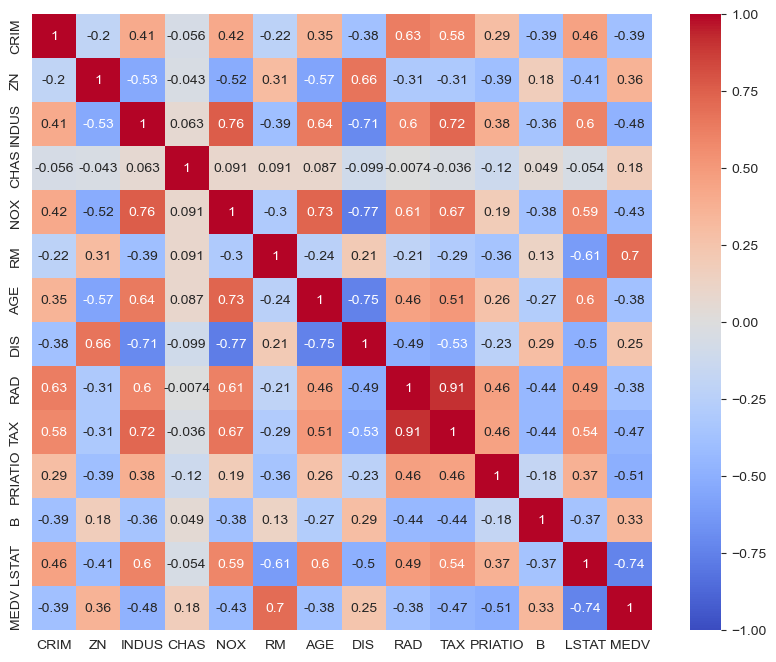

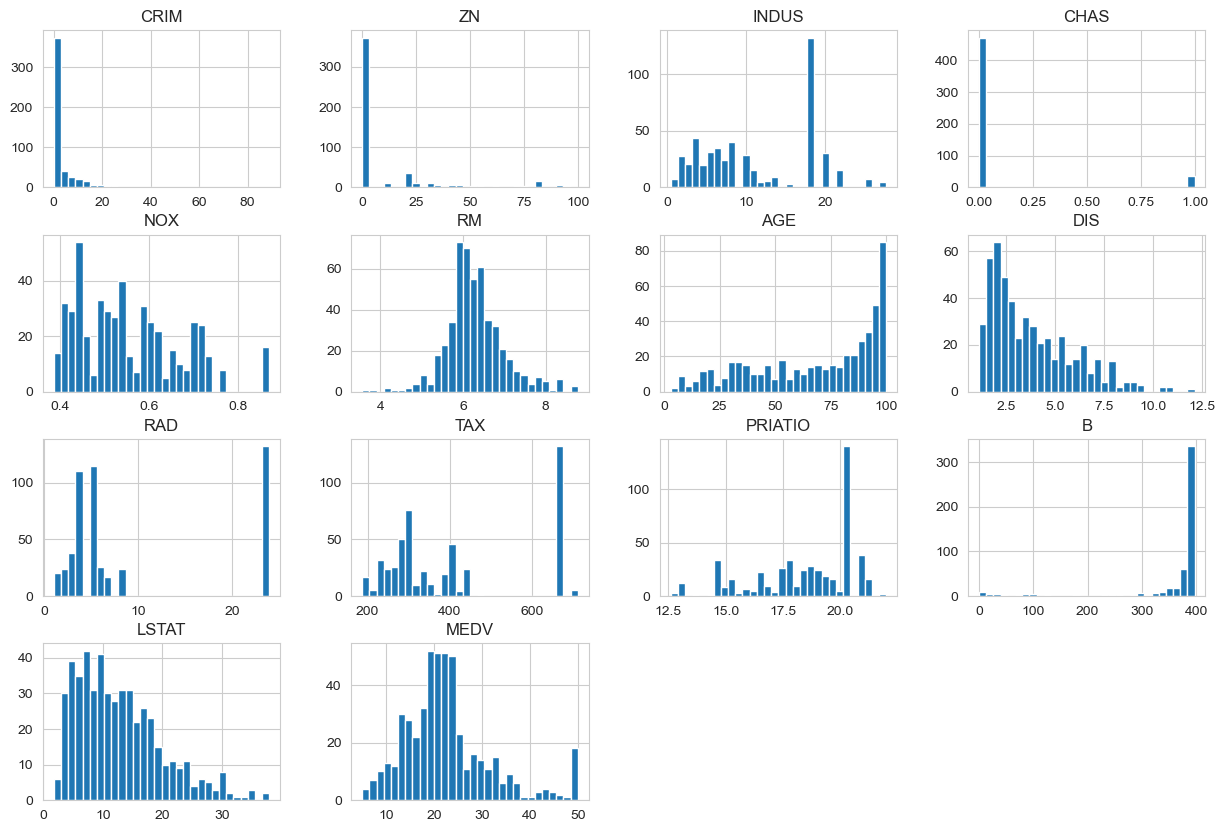

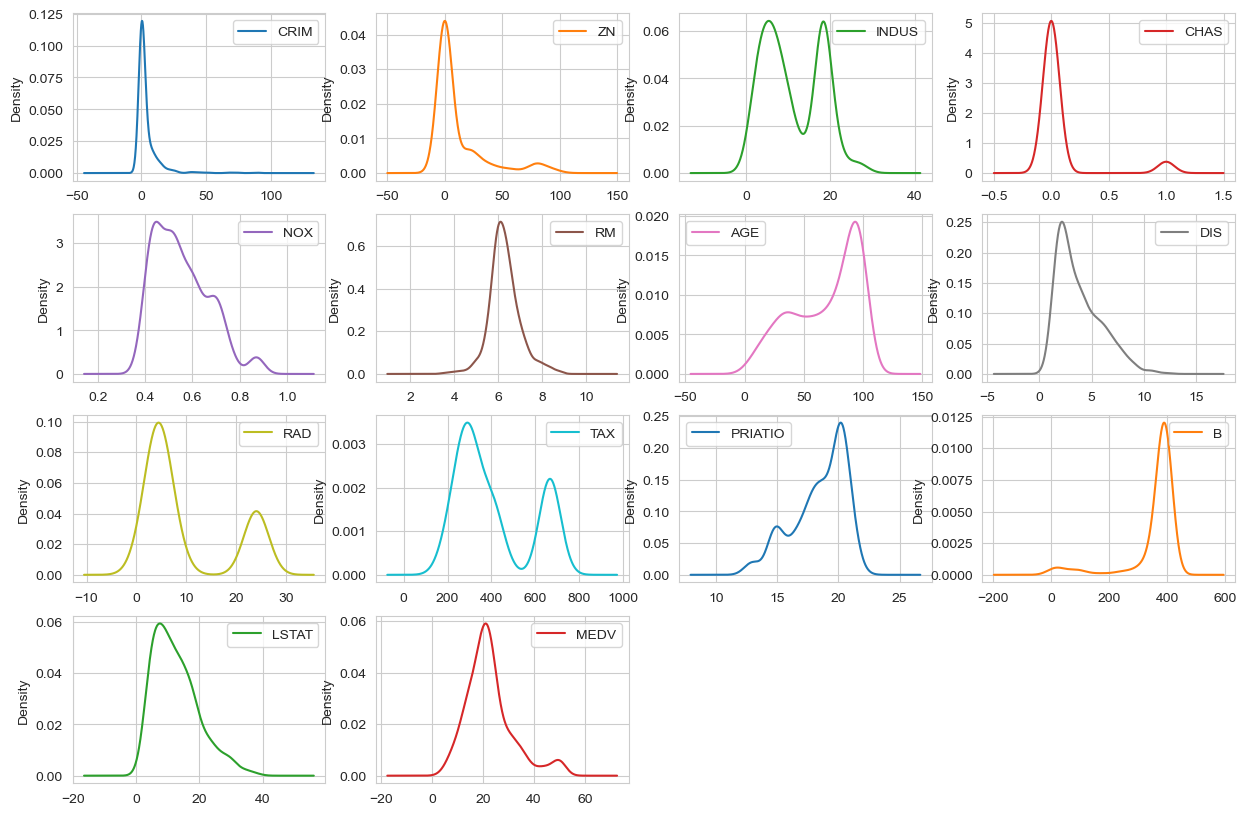

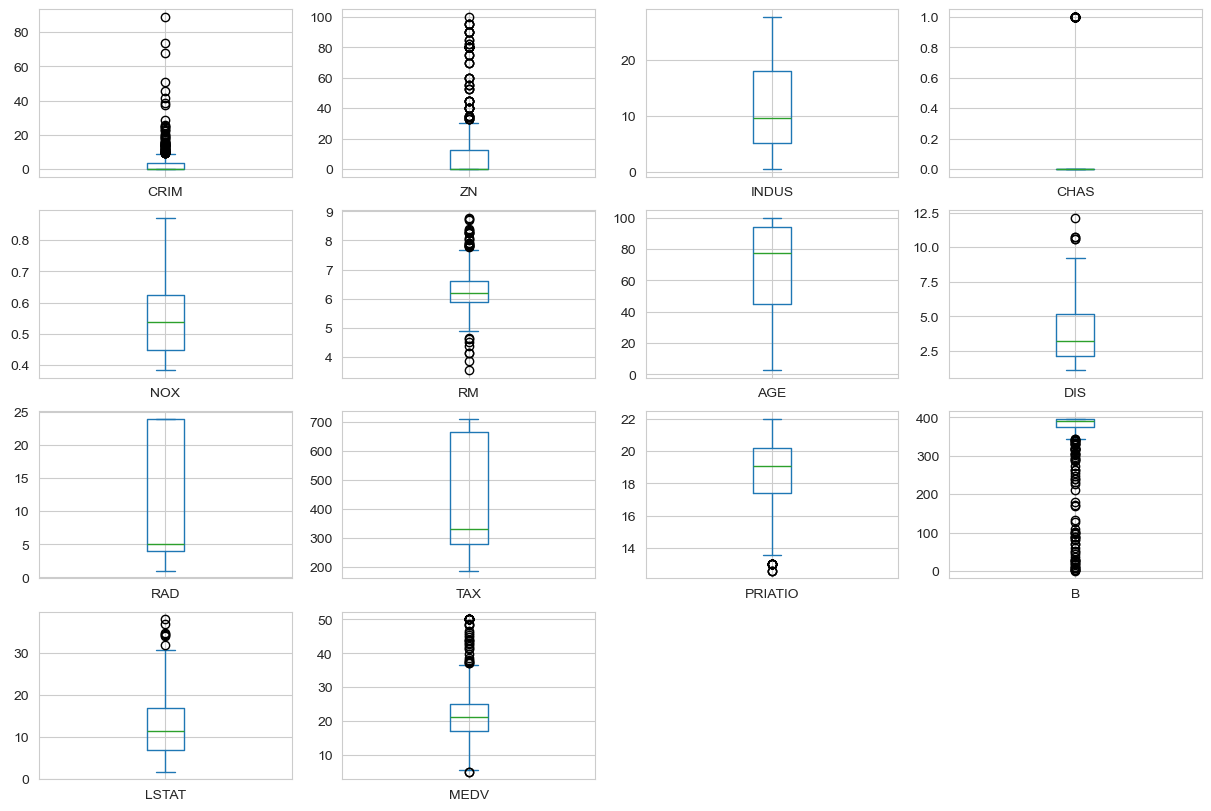

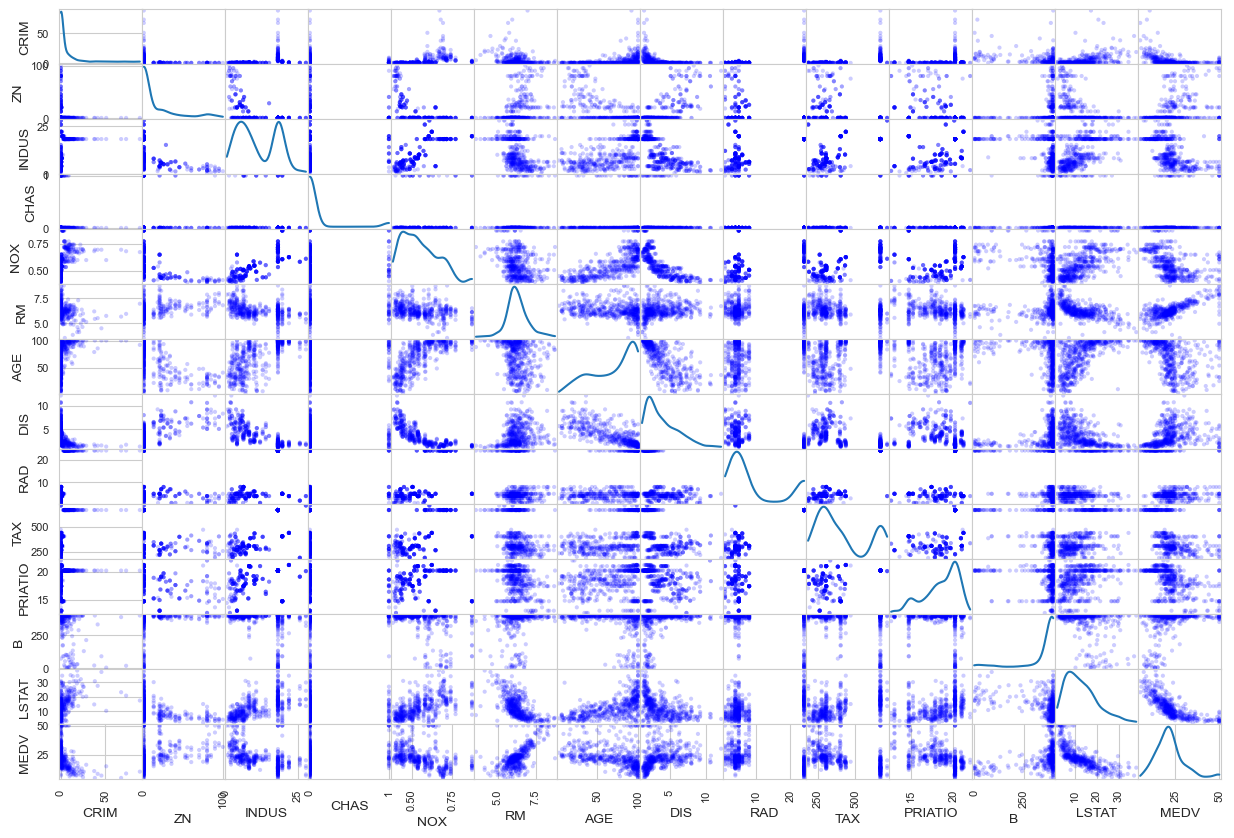

In [43]:
# 特征关联性可视化
plt.figure(figsize=(10, 8))
sns.heatmap(house_data_df.corr(method="pearson"), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()
# TAX和 RAD之间的正相关性很高；MEDV和RM；INDUS和NOX、TAX；NOX和AGE
# DIS和INDUS、NOX、AGE 负相关性高；LSTAT和MEDV；

#数据可视化
# 数据直方图
house_data_df.hist(sharex=False, sharey=False, figsize=(15, 10), bins=30)

# 分布概率密度图
house_data_df.plot(kind='density', subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False, sharey=False)

# 箱线图 查看数据分布和偏态以及异常情况
house_data_df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False, sharey=False)

# 散点矩阵图
scatter_matrix(house_data_df, figsize=(15, 10), alpha=0.2, diagonal='kde', color='blue')
plt.show()

### 数据分析和处理
- 数据包含关联性特征，通过特征选择减少相关性高的特征
- 数据度量单位差异较大，通过标准化处理数据
- 数据分布不均匀，存在偏态和异常值，通过正态化数据提高算法准确性


In [44]:
# 划分测试和训练数据集
data = house_data_df.values
X = data[:, 0:13]
Y = data[:, 13]
vaildation_size = 0.2
X_train, X_vaild, Y_train, Y_vaild = train_test_split(X, Y, test_size=vaildation_size, random_state=42)


模型：LinearRegression: k折验证mse均值：24.050948 (标准差：6.701772)
模型：Lasso: k折验证mse均值：28.610351 (标准差：8.663717)
模型：ES: k折验证mse均值：28.636920 (标准差：8.481156)
模型：CART: k折验证mse均值：30.349393 (标准差：12.303094)
模型：KNN: k折验证mse均值：44.499824 (标准差：15.138300)
模型：SVM: k折验证mse均值：71.488788 (标准差：28.473454)


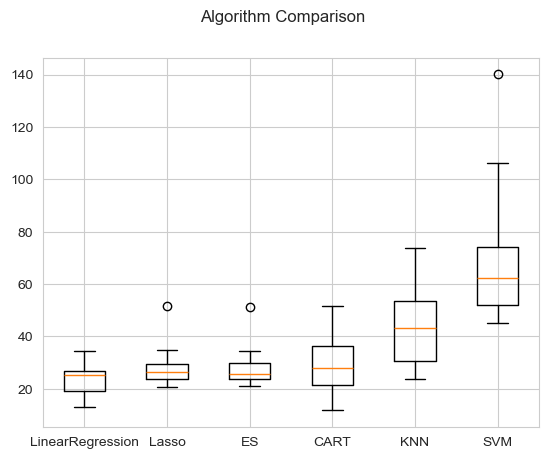

In [45]:
# 算法
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

models = {}
models['LinearRegression'] = LinearRegression()  # 线性回归:对数据特征数量较多，或者特征之间存在高度相关性时，线性回归可能会过拟合。
models['Lasso'] = Lasso()  # Lasso回归: Lasso回归通过L1正则化来减少模型复杂度,实现特征选择，防止过拟合。是和高维数据。
models['ES'] = ElasticNet()  # 弹性网络回归:结合了Lasso和Ridge回归的优点，适用于特征数量多且存在多重共线性的情况。
models['CART'] = DecisionTreeRegressor()
models['KNN'] = KNeighborsRegressor()
models['SVM'] = SVR()

results = []
for key in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_result = -cross_val_score(models[key], X_train, Y_train, cv=kfold, scoring=scoring)  # 返回K折验证的scoring结果
    results.append(cv_result)
    print('模型：%s: k折验证mse均值：%f (标准差：%f)' % (key, cv_result.mean(), cv_result.std()))
# 结果评估 箱线图
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()
# 模型训练看线性模型的效果最好,KNN和SVM的效果明显差，可能因为数据特征量纲差异较大

模型：ScalerLR: k折验证mse均值：24.050948 (标准差：6.701772)
模型：ScalerLasso: k折验证mse均值：29.415693 (标准差：9.837243)
模型：ScalerES: k折验证mse均值：30.868589 (标准差：11.345965)
模型：ScalerCART: k折验证mse均值：29.786545 (标准差：14.479709)
模型：ScalerKNN: k折验证mse均值：25.321312 (标准差：9.750005)
模型：ScalerSVM: k折验证mse均值：31.587298 (标准差：12.608952)


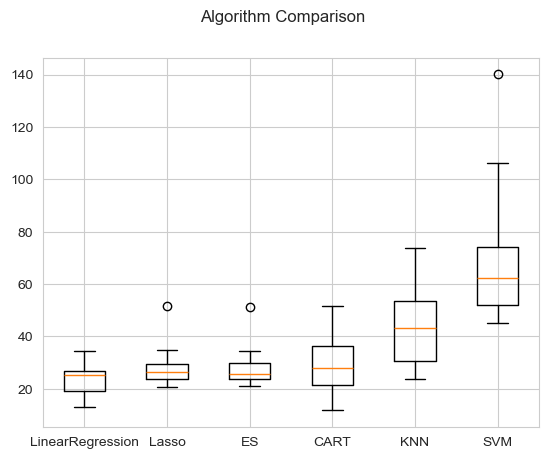

In [46]:
# 结合数据标准化处理重新对比效果
pipelines = {}
pipelines['ScalerLR'] = Pipeline([("Scaler", StandardScaler()), ("LR", LinearRegression())])
pipelines['ScalerLasso'] = Pipeline([("Scaler", StandardScaler()), ("Lasso", Lasso())])
pipelines['ScalerES'] = Pipeline([("Scaler", StandardScaler()), ("ES", ElasticNet())])
pipelines['ScalerCART'] = Pipeline([("Scaler", StandardScaler()), ("CART", DecisionTreeRegressor())])
pipelines['ScalerKNN'] = Pipeline([("Scaler", StandardScaler()), ("KNN", KNeighborsRegressor())])
pipelines['ScalerSVM'] = Pipeline([("Scaler", StandardScaler()), ("SVM", SVR())])

pipe_results = []
for key in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_result = -cross_val_score(pipelines[key], X_train, Y_train, cv=kfold, scoring=scoring)  # 返回K折验证的scoring结果
    pipe_results.append(cv_result)
    print('模型：%s: k折验证mse均值：%f (标准差：%f)' % (key, cv_result.mean(), cv_result.std()))

fig2 = plt.figure()
fig2.suptitle('Algorithm Comparison')
ax = fig2.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

# KNN的效果在数据标准化后明显提高，对于KNN可以调整K值来优化模型

In [47]:
# KNN调参 使用GridSearchCV网格搜索算法
scaler = StandardScaler().fit(X_train)
print(scaler.mean_)
print(scaler.scale_)
scalered_x = scaler.transform(X_train)
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}
knn = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grids = GridSearchCV(knn, param_grid, cv=kfold, scoring=scoring)
grids_res = grids.fit(X=scalered_x, y=Y_train)
print("best score: ", grids.best_score_)
print("best params:", grids.best_params_)

cv_results = zip(grids_res.cv_results_['mean_test_score'], grids_res.cv_results_['std_test_score'],
                 grids_res.cv_results_['params'])
for mean, std, param in cv_results:
    print('%f (%f) with %r' % (mean, std, param))


[3.60912463e+00 1.15693069e+01 1.09850495e+01 7.17821782e-02
 5.56484158e-01 6.31589109e+00 6.85564356e+01 3.80819505e+00
 9.35643564e+00 4.04032178e+02 1.83183168e+01 3.56278342e+02
 1.24573515e+01]
[8.86406744e+00 2.31238090e+01 6.88607935e+00 2.58126901e-01
 1.17558710e-01 7.08573178e-01 2.79602535e+01 2.12858714e+00
 8.57908366e+00 1.65966869e+02 2.22594093e+00 9.14531376e+01
 7.10157559e+00]
best score:  -20.18447913279133
best params: {'n_neighbors': 3}
-20.438038 (9.794370) with {'n_neighbors': 1}
-20.184479 (6.299937) with {'n_neighbors': 3}
-24.959813 (9.585036) with {'n_neighbors': 5}
-25.328534 (9.171709) with {'n_neighbors': 7}
-24.719780 (9.522515) with {'n_neighbors': 9}
-24.191355 (9.858151) with {'n_neighbors': 11}
-24.146670 (9.115731) with {'n_neighbors': 13}
-24.935048 (9.618550) with {'n_neighbors': 15}


 # 使用复杂一些的模型进行训练和预测验证效果
>> 随机森林RFR、梯度提升GBR、AdaBoost算法、lightGBM、XGB


模型：RFR: k折验证mse均值：14.219462 (标准差：5.480824)
模型：GBR: k折验证mse均值：12.495530 (标准差：4.735403)
模型：AdaBoost: k折验证mse均值：16.921171 (标准差：5.770626)


/Users/wangjing/opt/anaconda3/envs/open_manus/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/wangjing/opt/anaconda3/envs/open_manus/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/wangjing/opt/anaconda3/envs/open_manus/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/wangjing/opt/anaconda3/envs/open_manus/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/wangjing/opt/anaconda3/envs/open_manus/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: 

模型：LGBM: k折验证mse均值：14.104972 (标准差：5.419585)
模型：XGB: k折验证mse均值：14.705503 (标准差：5.065821)


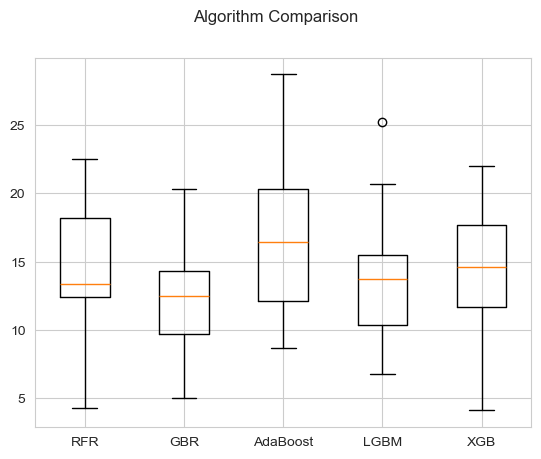

In [48]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

ensemble_models = {}
ensemble_models['RFR'] = Pipeline([('Scaler', StandardScaler()), ('RFR', RandomForestRegressor())])
ensemble_models['GBR'] = Pipeline([('Scaler', StandardScaler()), ('GBR', GradientBoostingRegressor())])
ensemble_models['AdaBoost'] = Pipeline([('Scaler', StandardScaler()), ('AdaBoost', AdaBoostRegressor())])
ensemble_models['LGBM'] = Pipeline([('Scaler', StandardScaler()), ('LGBM', LGBMRegressor(**{'verbosity': -1}))])
ensemble_models['XGB'] = Pipeline([('Scaler', StandardScaler()), ('XGB', XGBRegressor())])

ensemble_results = []
for key in ensemble_models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_result = -cross_val_score(ensemble_models[key], X_train, Y_train, cv=kfold, scoring=scoring)  # 返回K折验证的scoring结果
    ensemble_results.append(cv_result)
    print('模型：%s: k折验证mse均值：%f (标准差：%f)' % (key, cv_result.mean(), cv_result.std()))
# 集成算法 --- 箱线图
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(ensemble_results)
ax.set_xticklabels(ensemble_models.keys())
plt.show()

模型：RFR: k折验证mse均值：14.282697 (标准差：5.929392)
模型：GBR: k折验证mse均值：12.560803 (标准差：4.635856)
模型：AdaBoost: k折验证mse均值：16.984034 (标准差：5.184558)


/Users/wangjing/opt/anaconda3/envs/open_manus/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/wangjing/opt/anaconda3/envs/open_manus/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/wangjing/opt/anaconda3/envs/open_manus/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/wangjing/opt/anaconda3/envs/open_manus/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/wangjing/opt/anaconda3/envs/open_manus/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: 

模型：LGBM: k折验证mse均值：14.094571 (标准差：5.062397)
模型：XGB: k折验证mse均值：14.705503 (标准差：5.065821)


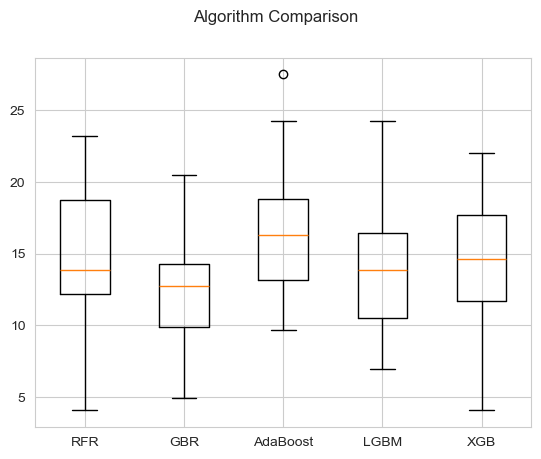

In [49]:
# 对于树模型 数据标准化处理对模型效果提升不明显，可以去掉数据标准化处理
ensemble_models1 = {}
ensemble_models1['RFR'] = Pipeline([('RFR', RandomForestRegressor())])
ensemble_models1['GBR'] = Pipeline([('GBR', GradientBoostingRegressor())])
ensemble_models1['AdaBoost'] = Pipeline([('AdaBoost', AdaBoostRegressor())])
ensemble_models1['LGBM'] = Pipeline([('LGBM', LGBMRegressor(**{'verbosity': -1}))])
ensemble_models1['XGB'] = Pipeline([('XGB', XGBRegressor())])

ensemble_results1 = []
for key in ensemble_models1:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_result = -cross_val_score(ensemble_models1[key], X_train, Y_train, cv=kfold, scoring=scoring)  # 返回K折验证的scoring结果
    ensemble_results1.append(cv_result)
    print('模型：%s: k折验证mse均值：%f (标准差：%f)' % (key, cv_result.mean(), cv_result.std()))
# 集成算法 --- 箱线图
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(ensemble_results1)
ax.set_xticklabels(ensemble_models1.keys())
plt.show()

In [50]:
# 算法调参 GBR & LGBM 
param_grid = {'n_estimators': [50, 100, 150, 200, 300, 400, 500, 600], 'learning_rate': [0.05, 0.1]}
model = GradientBoostingRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grids = GridSearchCV(model, param_grid, cv=kfold, scoring=scoring)
grids_res = grids.fit(X=X_train, y=Y_train)
print("best score: ", grids.best_score_)
print("best params:", grids.best_params_)
cv_results = zip(grids_res.cv_results_['mean_test_score'], grids_res.cv_results_['std_test_score'],
                 grids_res.cv_results_['params'])
for mean, std, param in cv_results:
    print('GBR效果: %f (%f) 参数 ：%r' % (mean, std, param))

# LGBM调参
param_grid = {'n_estimators': [50, 100, 150, 200, 300, 400, 500, 600], 'learning_rate': [0.05, 0.1]}
model = LGBMRegressor(**{'verbosity': -1})
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grids = GridSearchCV(model, param_grid, cv=kfold, scoring=scoring)
grids_res = grids.fit(X=X_train, y=Y_train)
print("best score: ", grids.best_score_)
print("best params:", grids.best_params_)
cv_results = zip(grids_res.cv_results_['mean_test_score'], grids_res.cv_results_['std_test_score'],
                 grids_res.cv_results_['params'])
for mean, std, param in cv_results:
    print('lgbm效果：%f (%f) 参数 %r' % (mean, std, param))

best score:  -12.029854021017265
best params: {'learning_rate': 0.1, 'n_estimators': 200}
GBR效果: -15.321623 (5.286352) 参数 ：{'learning_rate': 0.05, 'n_estimators': 50}
GBR效果: -13.004222 (5.185595) 参数 ：{'learning_rate': 0.05, 'n_estimators': 100}
GBR效果: -12.589990 (4.944494) 参数 ：{'learning_rate': 0.05, 'n_estimators': 150}
GBR效果: -12.528962 (4.967869) 参数 ：{'learning_rate': 0.05, 'n_estimators': 200}
GBR效果: -12.409969 (4.898605) 参数 ：{'learning_rate': 0.05, 'n_estimators': 300}
GBR效果: -12.668098 (5.260277) 参数 ：{'learning_rate': 0.05, 'n_estimators': 400}
GBR效果: -12.776055 (5.248738) 参数 ：{'learning_rate': 0.05, 'n_estimators': 500}
GBR效果: -12.777233 (5.184023) 参数 ：{'learning_rate': 0.05, 'n_estimators': 600}
GBR效果: -13.027713 (4.825210) 参数 ：{'learning_rate': 0.1, 'n_estimators': 50}
GBR效果: -12.397140 (4.509782) 参数 ：{'learning_rate': 0.1, 'n_estimators': 100}
GBR效果: -12.217010 (4.420793) 参数 ：{'learning_rate': 0.1, 'n_estimators': 150}
GBR效果: -12.029854 (4.310961) 参数 ：{'learning_rate': 0.1, '

/Users/wangjing/opt/anaconda3/envs/open_manus/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/wangjing/opt/anaconda3/envs/open_manus/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/wangjing/opt/anaconda3/envs/open_manus/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/wangjing/opt/anaconda3/envs/open_manus/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/wangjing/opt/anaconda3/envs/open_manus/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: 

best score:  -13.685322351535026
best params: {'learning_rate': 0.05, 'n_estimators': 500}
lgbm效果：-17.413822 (7.498783) 参数 {'learning_rate': 0.05, 'n_estimators': 50}
lgbm效果：-14.908137 (5.951459) 参数 {'learning_rate': 0.05, 'n_estimators': 100}
lgbm效果：-14.262785 (5.448040) 参数 {'learning_rate': 0.05, 'n_estimators': 150}
lgbm效果：-14.037917 (5.288166) 参数 {'learning_rate': 0.05, 'n_estimators': 200}
lgbm效果：-13.800602 (5.085951) 参数 {'learning_rate': 0.05, 'n_estimators': 300}
lgbm效果：-13.729799 (5.154570) 参数 {'learning_rate': 0.05, 'n_estimators': 400}
lgbm效果：-13.685322 (5.188160) 参数 {'learning_rate': 0.05, 'n_estimators': 500}
lgbm效果：-13.697979 (5.174297) 参数 {'learning_rate': 0.05, 'n_estimators': 600}
lgbm效果：-14.622329 (5.757897) 参数 {'learning_rate': 0.1, 'n_estimators': 50}
lgbm效果：-14.094571 (5.062397) 参数 {'learning_rate': 0.1, 'n_estimators': 100}
lgbm效果：-14.059650 (5.089425) 参数 {'learning_rate': 0.1, 'n_estimators': 150}
lgbm效果：-14.002333 (5.172601) 参数 {'learning_rate': 0.1, 'n_estimator

/Users/wangjing/opt/anaconda3/envs/open_manus/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


6.133447675026384


Text(0.5, 1.0, 'Actual vs Predicted Prices')

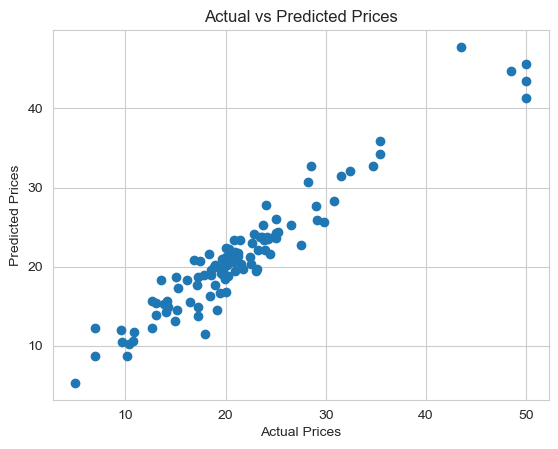

In [53]:
# 效果最好的模型为GBR，参数：{'learning_rate': 0.1, 'n_estimators': 200}
# 使用GBR模型进行预测
gbr_model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=200)
gbr_model.fit(X_train, Y_train)
# 模型预测
predictions = gbr_model.predict(X_vaild)
# 预测结果评估
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_vaild, predictions))
# 可视化预测结果
plt.scatter(Y_vaild, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')